# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net
from diff_equation import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)
np.random.seed(10)

# Training Data

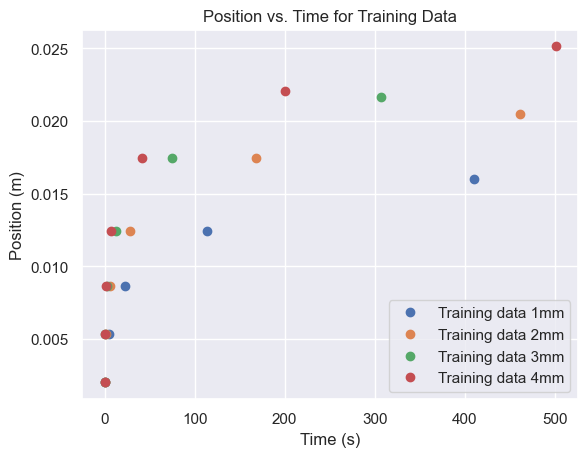

In [2]:
# Grab training data
dim_data = grab_training_data()

# Define legends for dimensionalized data
dim_legend = ['Training data 1mm', 'Training data 2mm', 'Training data 3mm', 'Training data 4mm']

# Functions to plot dimensionalized and nondimensionalized data
def plot_dim_data(show=True):
    for i in range(0, len(dim_data)):
        plt.plot(dim_data[i]['TIME'], dim_data[i]['DISTANCE'], 'o')
    plt.legend(dim_legend)
    plt.ylabel('Position (m)')
    plt.xlabel('Time (s)')
    plt.title('Position vs. Time for Training Data')
    if show:
        plt.show()

# Plot dimensionalized training data
plot_dim_data()

# Run the Model

Losses for 1mm droplet:


c:\Users\rahav\Documents\GitHub\pinns-model\.venv\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 1/20000, data loss: 34584.609375, physics loss: 12712061960192.0
Epoch 2/20000, data loss: 32522.93359375, physics loss: 9940014989312.0
Epoch 3/20000, data loss: 30547.017578125, physics loss: 7734743269376.0
Epoch 4/20000, data loss: 28669.126953125, physics loss: 6000058826752.0
Epoch 5/20000, data loss: 26898.12890625, physics loss: 4648394031104.0
Epoch 6/20000, data loss: 25239.625, physics loss: 3602939379712.0
Epoch 7/20000, data loss: 23695.9609375, physics loss: 2798559952896.0
Epoch 8/20000, data loss: 22299.478515625, physics loss: 2192910581760.0
Epoch 9/20000, data loss: 21044.99609375, physics loss: 1739239456768.0
Epoch 10/20000, data loss: 19885.1796875, physics loss: 1386115235840.0
Epoch 2000/20000, data loss: 284.64031982421875, physics loss: 56838.09375
Epoch 4000/20000, data loss: 170.73695373535156, physics loss: 7250.6728515625
Epoch 6000/20000, data loss: 0.24173828959465027, physics loss: 4.6523734908987535e-07
Epoch 8000/20000, data loss: 0.008662188425

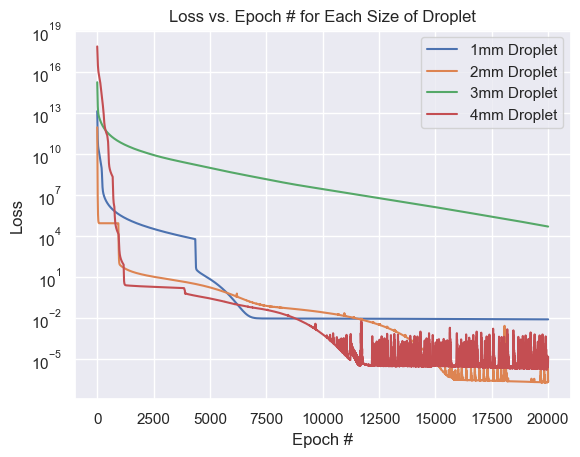

In [3]:
plt.yscale('log')
different_droplet_networks = [None] * len(dim_data)

'''
Train model for each droplet size, plot losses for each one.
Change the bounds on this loop and subsequent ones from '0', 'len(different_droplet_networks)' to '0', '1' to do only the 1mm droplet.
You can change the bounds similarly to only train the network for other-sized droplets.
'''
for i in range(0, len(different_droplet_networks)):
    different_droplet_networks[i] = Net(1, 1, droplet_size_idx=i, loss2=physics_loss_dim, epochs=20000, loss1_weight=10000, loss2_weight=1, lr=1e-5).to(DEVICE)
    print(f'Losses for {i+1}mm droplet:')
    losses = different_droplet_networks[i].fit(np.array(dim_data[i]['TIME']), np.array(dim_data[i]['DISTANCE']))
    print()
    plt.plot(losses)
plt.legend(['1mm Droplet', '2mm Droplet', '3mm Droplet', '4mm Droplet'])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch # for Each Size of Droplet')
plt.show()

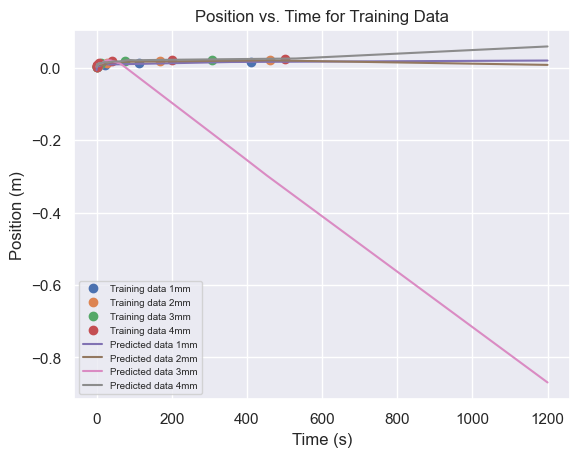

In [8]:
'''
Plot the dimensionalized data for each droplet as well as each respective dimensionalized model
'''

# Plot dimensionalized data
plot_dim_data(show=False)

# Use nondimensionalized model to make prediction
times = np.linspace(0, 1200, 1200)

# Plot dimensionalized model
for i in range(0, len(different_droplet_networks)):
    preds = different_droplet_networks[i].predict(times)
    plt.plot(times, preds)
    dim_legend.append(f'Predicted data {i+1}mm')
plt.legend(dim_legend, fontsize=7)
plt.show()